**Problem Statement**

As a data scientist at a music streaming company, your task is to analyze the key platform-related and release features that influence a song’s popularity in 2024.

The goal is to build a data-driven model that can:
- Predict a song’s popularity (number of streams) using features such as playlist reach, platform engagement metrics, and release timing.
- Provide actionable insights for Marketing and A&R teams on which features most strongly drive streaming performance.

Your analysis will also help guide:
- Playlist strategy: deciding which songs to promote on high-reach playlists.
- Cross-platform promotion: optimizing song exposure across Spotify, YouTube, TikTok, Deezer, Amazon, and Pandora.
- Talent scouting: identifying artists and songs with high potential based on data-driven characteristics.

**Importing Our Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

In [7]:
#reading our data
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv/Most Streamed Spotify Songs 2024.csv', encoding='latin1') 

**DATA CLEANING**

In [10]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [12]:
#features of dataset
print(df.dtypes)

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [14]:
#checking the numbers of values we have in each column
df.count()

Track                         4600
Album Name                    4600
Artist                        4595
Release Date                  4600
ISRC                          4600
All Time Rank                 4600
Track Score                   4600
Spotify Streams               4487
Spotify Playlist Count        4530
Spotify Playlist Reach        4528
Spotify Popularity            3796
YouTube Views                 4292
YouTube Likes                 4285
TikTok Posts                  3427
TikTok Likes                  3620
TikTok Views                  3619
YouTube Playlist Reach        3591
Apple Music Playlist Count    4039
AirPlay Spins                 4102
SiriusXM Spins                2477
Deezer Playlist Count         3679
Deezer Playlist Reach         3672
Amazon Playlist Count         3545
Pandora Streams               3494
Pandora Track Stations        3332
Soundcloud Streams            1267
Shazam Counts                 4023
TIDAL Popularity                 0
Explicit Track      

In [16]:
# Clean column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [18]:
df.head()

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [20]:
#checking for null values
df.isnull().sum()

track                            0
album_name                       0
artist                           5
release_date                     0
isrc                             0
all_time_rank                    0
track_score                      0
spotify_streams                113
spotify_playlist_count          70
spotify_playlist_reach          72
spotify_popularity             804
youtube_views                  308
youtube_likes                  315
tiktok_posts                  1173
tiktok_likes                   980
tiktok_views                   981
youtube_playlist_reach        1009
apple_music_playlist_count     561
airplay_spins                  498
siriusxm_spins                2123
deezer_playlist_count          921
deezer_playlist_reach          928
amazon_playlist_count         1055
pandora_streams               1106
pandora_track_stations        1268
soundcloud_streams            3333
shazam_counts                  577
tidal_popularity              4600
explicit_track      

In [22]:
df.duplicated().sum()

np.int64(2)

In [24]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

np.int64(0)

In [30]:
#filling our missing values with the median 
median_fill_cols = [
    "spotify_streams", "spotify_playlist_count", "spotify_playlist_reach",
    "youtube_views", "youtube_likes", "tiktok_posts", "tiktok_likes",
    "tiktok_views", "youtube_playlist_reach", "apple_music_playlist_count",
    "airplay_spins", "pandora_streams", "pandora_track_stations",
    "shazam_counts"
]

# Convert all numeric columns with comma formatting to numeric
for col in median_fill_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)


for col in median_fill_cols:
    df[col + "_missing"] = df[col].isna().astype(int)
    df[col] = df[col].fillna(df[col].median())

In [32]:
#Not every song is distributed on Deezer / Amazon.filling the missing values with 0 is better
zero_fill_cols = [
    "deezer_playlist_count",
    "deezer_playlist_reach",
    "amazon_playlist_count"
]

for col in zero_fill_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)


for col in zero_fill_cols:
    df[col + "_missing"] = df[col].isna().astype(int)
    df[col] = df[col].fillna(0)

In [34]:
df['artist'] = df['artist'].fillna("Unknown Artist")

In [38]:
df = df.drop(columns=["tidal_popularity", "soundcloud_streams", "siriusxm_spins"])

In [40]:
df = df.drop(columns=["spotify_popularity"])

In [42]:
df.count()

track                                 4598
album_name                            4598
artist                                4598
release_date                          4598
isrc                                  4598
all_time_rank                         4598
track_score                           4598
spotify_streams                       4598
spotify_playlist_count                4598
spotify_playlist_reach                4598
youtube_views                         4598
youtube_likes                         4598
tiktok_posts                          4598
tiktok_likes                          4598
tiktok_views                          4598
youtube_playlist_reach                4598
apple_music_playlist_count            4598
airplay_spins                         4598
deezer_playlist_count                 4598
deezer_playlist_reach                 4598
amazon_playlist_count                 4598
pandora_streams                       4598
pandora_track_stations                4598
shazam_coun

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   track                               4598 non-null   object 
 1   album_name                          4598 non-null   object 
 2   artist                              4598 non-null   object 
 3   release_date                        4598 non-null   object 
 4   isrc                                4598 non-null   object 
 5   all_time_rank                       4598 non-null   object 
 6   track_score                         4598 non-null   float64
 7   spotify_streams                     4598 non-null   float64
 8   spotify_playlist_count              4598 non-null   float64
 9   spotify_playlist_reach              4598 non-null   float64
 10  youtube_views                       4598 non-null   float64
 11  youtube_likes                       4598 non-nul

Converting these objects or strings types into numeric formats 

In [47]:
df.select_dtypes(include='object').columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank'],
      dtype='object')

In [49]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 {col} ({df[col].nunique()} unique values):\n{df[col].unique()}")


🔹 track (4370 unique values):
['MILLION DOLLAR BABY' 'Not Like Us' 'i like the way you kiss me' ...
 'Grace (feat. 42 Dugg)' 'Nashe Si Chadh Gayi'
 'Me Acostumbre (feat. Bad Bunny)']

🔹 album_name (4005 unique values):
['Million Dollar Baby - Single' 'Not Like Us' 'I like the way you kiss me'
 ... 'Dil Meri Na Sune (From "Genius")' 'November Top 10 Songs'
 'Me Acostumbre (feat. Bad Bunny)']

🔹 artist (2000 unique values):
['Tommy Richman' 'Kendrick Lamar' 'Artemas' ... 'Kerim Araz'
 'Jaques Raupï¿' 'BUSHIDO ZHO']

🔹 release_date (1562 unique values):
['4/26/2024' '5/4/2024' '3/19/2024' ... '10/31/2018' '11/8/2016'
 '4/11/2017']

🔹 isrc (4598 unique values):
['QM24S2402528' 'USUG12400910' 'QZJ842400387' ... 'USUG12000043'
 'INY091600067' 'USB271700107']

🔹 all_time_rank (4577 unique values):
['1' '2' '3' ... '4,571' '4,591' '4,593']


In [51]:
#Drop theses cause it has too many unique values and is hard to use in a model.
df.drop(["track", "album_name", "isrc"], axis=1, inplace=True)

In [53]:
# Encode artist
le = LabelEncoder()
df["artist_encoded"] = le.fit_transform(df["artist"])
df = df.drop(columns=["artist"])

# Convert release date to numeric features
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_day"] = df["release_date"].dt.day
df = df.drop(columns=["release_date"])

# Convert all_time_rank to numeric
df["all_time_rank"] = df["all_time_rank"].astype(str).str.replace(",", "").astype(float)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   all_time_rank                       4598 non-null   float64
 1   track_score                         4598 non-null   float64
 2   spotify_streams                     4598 non-null   float64
 3   spotify_playlist_count              4598 non-null   float64
 4   spotify_playlist_reach              4598 non-null   float64
 5   youtube_views                       4598 non-null   float64
 6   youtube_likes                       4598 non-null   float64
 7   tiktok_posts                        4598 non-null   float64
 8   tiktok_likes                        4598 non-null   float64
 9   tiktok_views                        4598 non-null   float64
 10  youtube_playlist_reach              4598 non-null   float64
 11  apple_music_playlist_count          4598 non-nul

In [57]:
#Saving the cleaned data for model training
model_train_df = df

In [59]:
model_train_df.head()

,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,...,pandora_streams_missing,pandora_track_stations_missing,shazam_counts_missing,deezer_playlist_count_missing,deezer_playlist_reach_missing,amazon_playlist_count_missing,artist_encoded,release_year,release_month,release_day
0,1.0,725.4,3.904709e+08,30716.0,196631588.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,...,0,0,0,0,0,0,1754,2024,4,26
1,2.0,545.9,3.237039e+08,28113.0,174597137.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,...,0,0,0,0,0,0,953,2024,5,4
2,3.0,538.4,6.013093e+08,54331.0,211607669.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,...,0,0,0,0,0,0,136,2024,3,19
3,4.0,444.9,2.031281e+09,269802.0,136569078.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,...,0,0,0,0,0,0,1234,2023,1,12
4,5.0,423.3,1.070349e+08,7223.0,151469874.0,7.737396e+07,3670188.0,16400.0,2.657692e+07,2.660640e+08,...,0,0,0,0,0,0,576,2024,5,31


In [61]:
model_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   all_time_rank                       4598 non-null   float64
 1   track_score                         4598 non-null   float64
 2   spotify_streams                     4598 non-null   float64
 3   spotify_playlist_count              4598 non-null   float64
 4   spotify_playlist_reach              4598 non-null   float64
 5   youtube_views                       4598 non-null   float64
 6   youtube_likes                       4598 non-null   float64
 7   tiktok_posts                        4598 non-null   float64
 8   tiktok_likes                        4598 non-null   float64
 9   tiktok_views                        4598 non-null   float64
 10  youtube_playlist_reach              4598 non-null   float64
 11  apple_music_playlist_count          4598 non-nul

**For data cleaning**, I inspected the dataset and noticed we have lot of missing datasets. I first fixed all numbers that were stored as text by removing commas and converting them into real numeric values so the model can use them correctly. I changed the release date into a proper date format so we can later create useful features like year or recency. For missing values, I filled some columns with the median because they are large numeric values with many outliers, and the median is safer. I filled some platform-related columns with zero because missing usually means the song was not on that platform. I dropped columns with too many missing values because they would only add noise. I also added “missing” indicator columns so the model can learn when a value was originally missing. After that, I removed duplicate rows and made sure every column had the correct data type. This made our dataset clean, consistent, and ready for modeling.

**Explaratory Data Analysis (EDA)**

Exploratory Data Analysis helps us understand the dataset deeply before building any model. It lets us:

- Spot patterns and trends
- Detect outliers and skewed distributions
- Understand which features are important
- Form data-driven hypothesesheses

In [65]:
df.describe()

,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,...,pandora_streams_missing,pandora_track_stations_missing,shazam_counts_missing,deezer_playlist_count_missing,deezer_playlist_reach_missing,amazon_playlist_count_missing,artist_encoded,release_year,release_month,release_day
count,4598.000000,4598.000000,4.598000e+03,4598.000000,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,4.598000e+03,...,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,2290.398869,41.850892,4.423060e+08,58985.167029,2.319380e+07,3.857353e+08,2.816064e+06,7.503451e+05,9.433634e+07,9.706313e+08,...,0.240539,0.275772,0.125489,0.200304,0.201827,0.229448,987.673119,2020.617225,6.044367,14.876251
std,1323.055783,38.550706,5.328602e+08,70679.706520,2.948596e+07,6.810648e+08,4.454401e+06,2.134179e+06,4.891026e+08,5.230691e+09,...,0.427458,0.446951,0.331309,0.400272,0.401407,0.420523,563.219622,3.612041,3.419001,9.041328
min,1.000000,19.400000,1.071000e+03,1.000000,1.000000e+00,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1987.000000,1.000000,1.000000
25%,1144.250000,23.300000,7.315308e+07,7017.250000,4.896219e+06,4.576491e+07,4.486530e+05,6.742500e+04,9.398120e+06,9.362825e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,517.000000,2019.000000,3.000000,7.000000
50%,2289.500000,29.900000,2.398507e+08,32312.500000,1.326411e+07,1.482696e+08,1.257935e+06,1.825290e+05,2.657692e+07,2.660640e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1003.000000,2022.000000,6.000000,15.000000
75%,3435.750000,44.475000,6.118920e+08,84952.750000,2.931328e+07,4.202808e+08,3.354939e+06,4.603338e+05,6.729765e+07,6.307454e+08,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1469.000000,2023.000000,9.000000,22.000000
max,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1999.000000,2024.000000,12.000000,31.000000


**Question:** How are streams, views, likes, and playlist counts distributed on each platform?

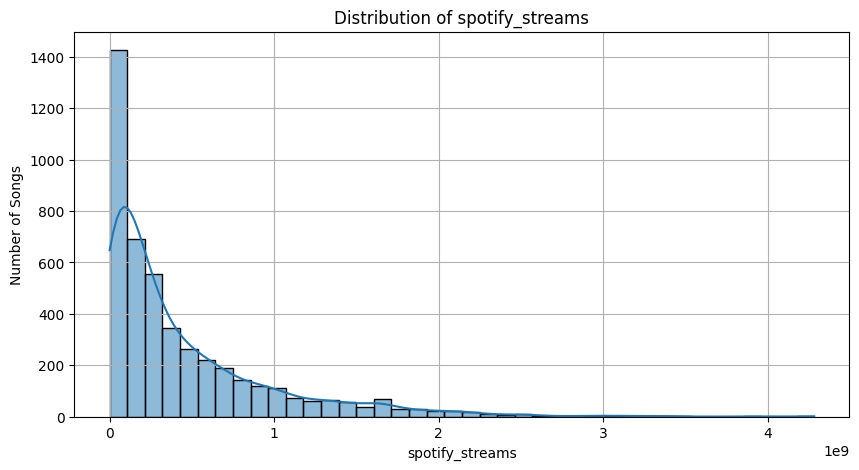

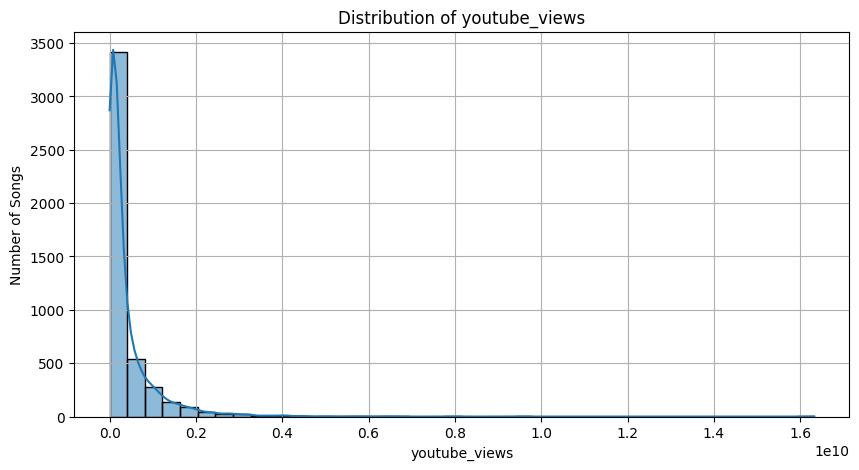

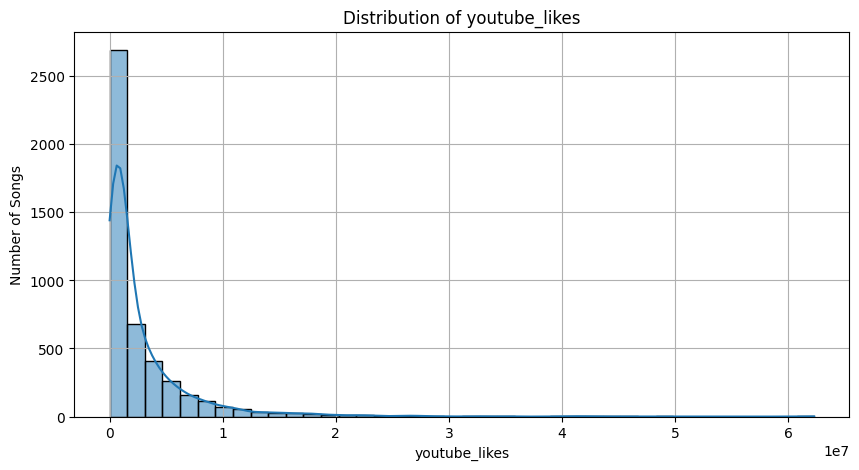

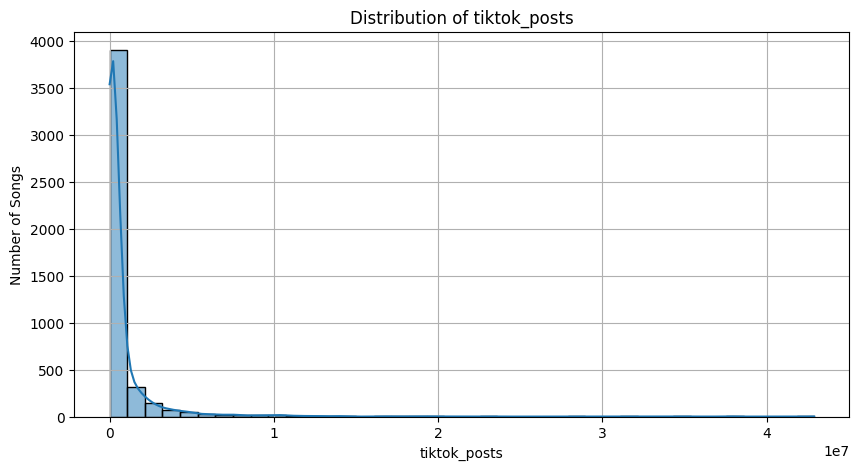

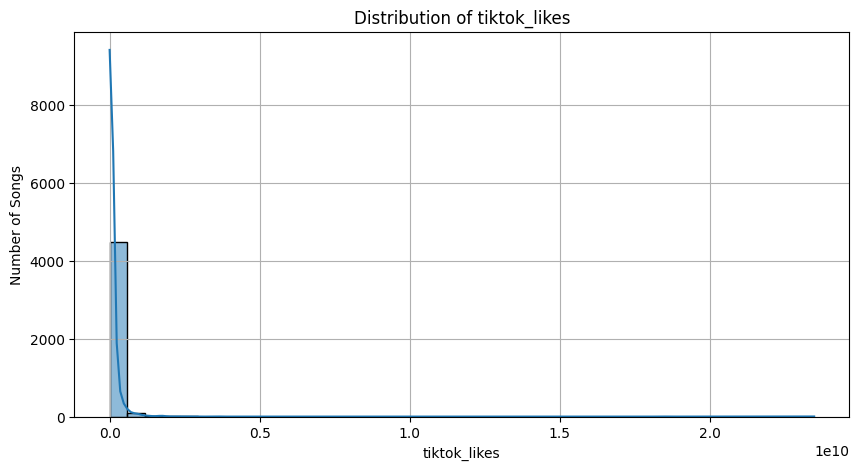

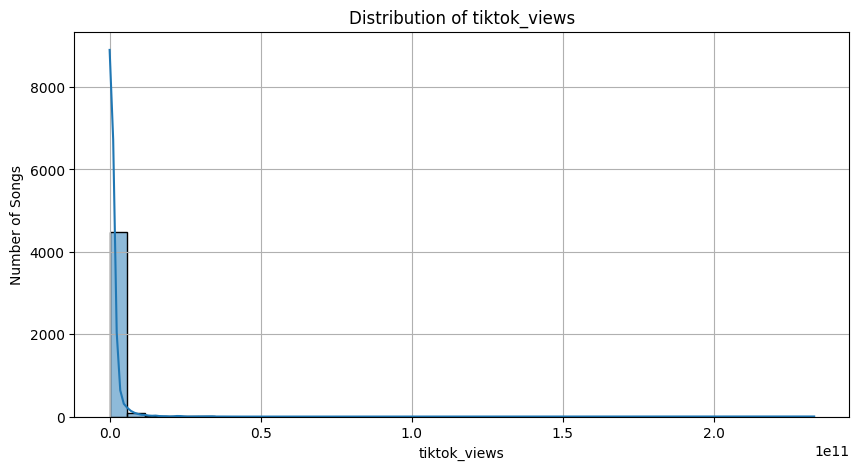

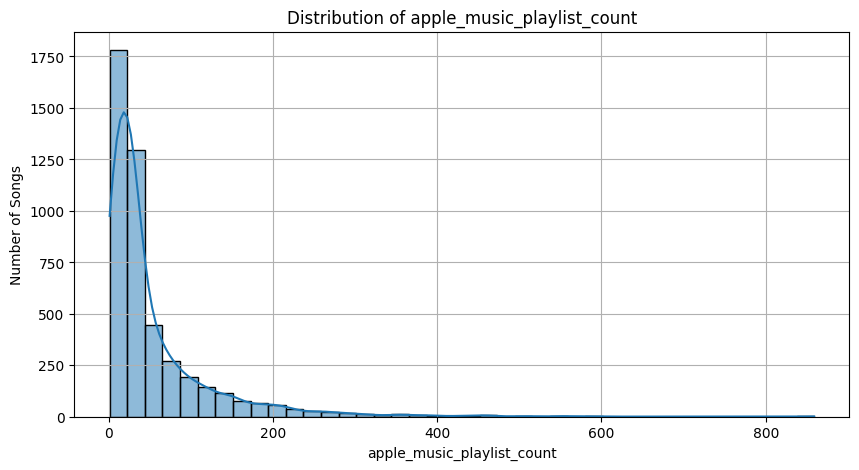

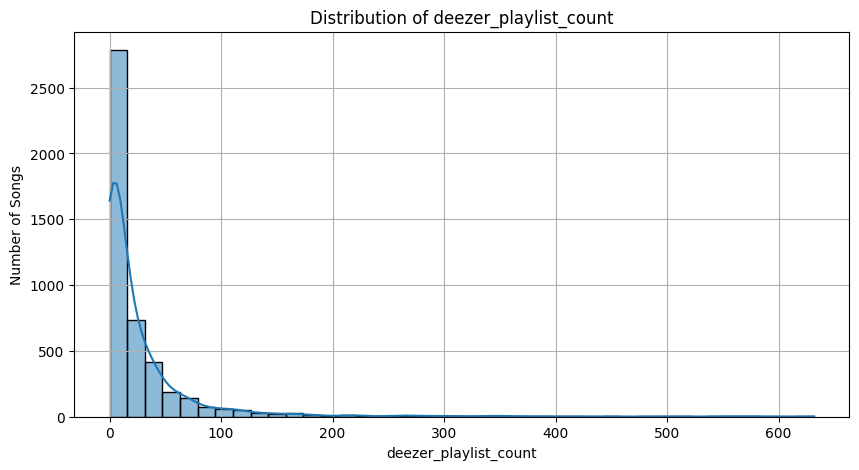

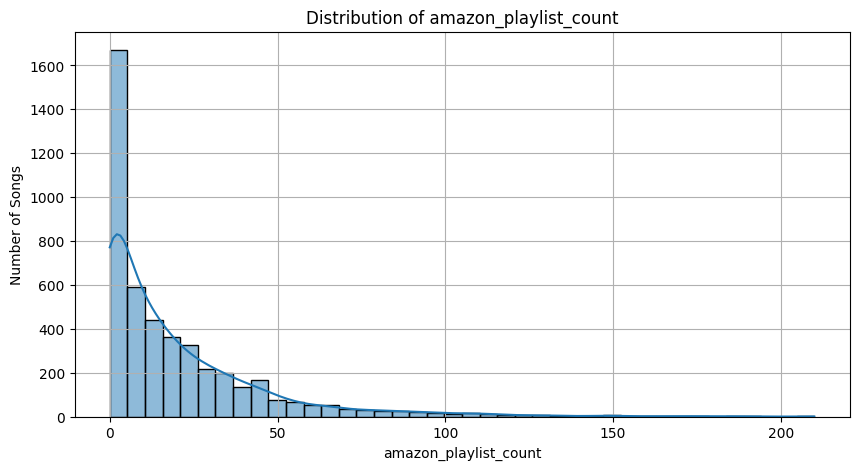

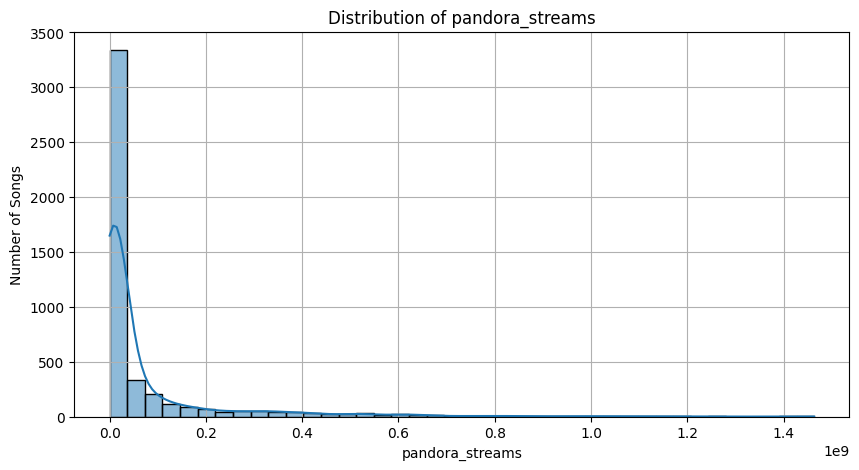

In [68]:
engagement_cols = [
    'spotify_streams', 'youtube_views', 'youtube_likes',
    'tiktok_posts', 'tiktok_likes', 'tiktok_views',
    'apple_music_playlist_count', 'deezer_playlist_count',
    'amazon_playlist_count', 'pandora_streams'
]

for col in engagement_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Songs")
    plt.grid(True)
    plt.show()

**Answer:** Our target variables are highly right-skewed i.e few songs across all platforms have very high streams, views, likes, and playlist counts while most have lower values, this tells us that these counts vary a lot.

**Question:** Which features are strongly related to Track Score?

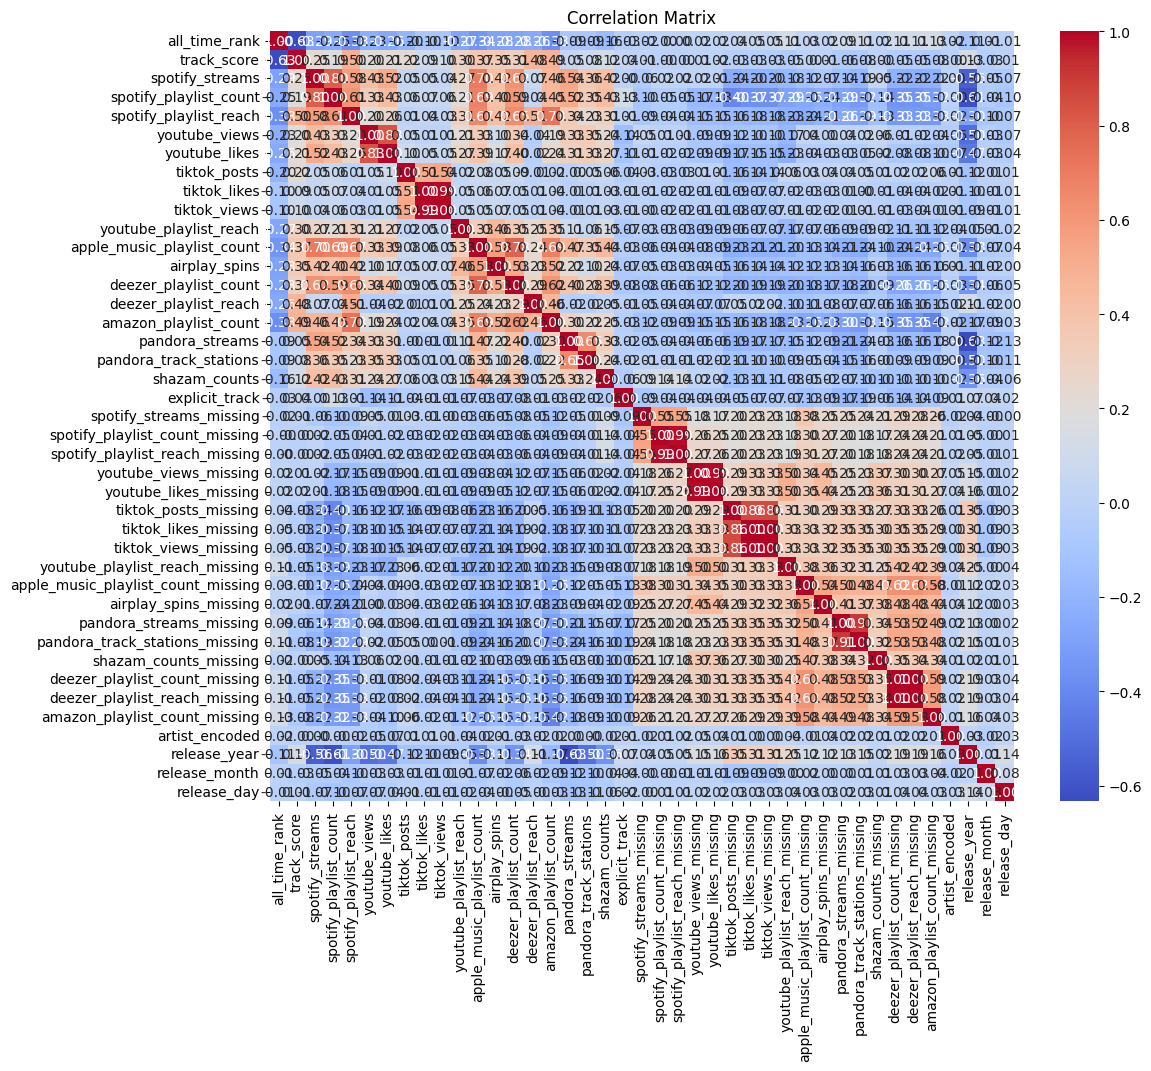

In [72]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Answer:** The features with the strongest positive correlations with Track Score are:
- spotify_streams, spotify_playlist_count, spotify_playlist_reach:  Show Strong positive correlation
- youTube_views, youTube_likes:  Strong positive correlation
- tikTok_posts, tikTok_likes: Moderate to strong positive correlation (orange)

The features with strong negative correlations with Track Score include:

Release_Day - Shows a notable negative correlation (blue)
Explicit Track - Moderate negative correlation (light blue)
Various "missing" data indicators - These show negative correlations (blue colors)

Key insight: Track Score is most strongly associated with streaming metrics (particularly spotify_streams) and playlist presence across platforms. The more streams, playlist inclusions, and social media engagement (YouTube, TikTok) a track has, the higher its Track Score tends to be.

**Question:** Are there extreme values that could affect the model?

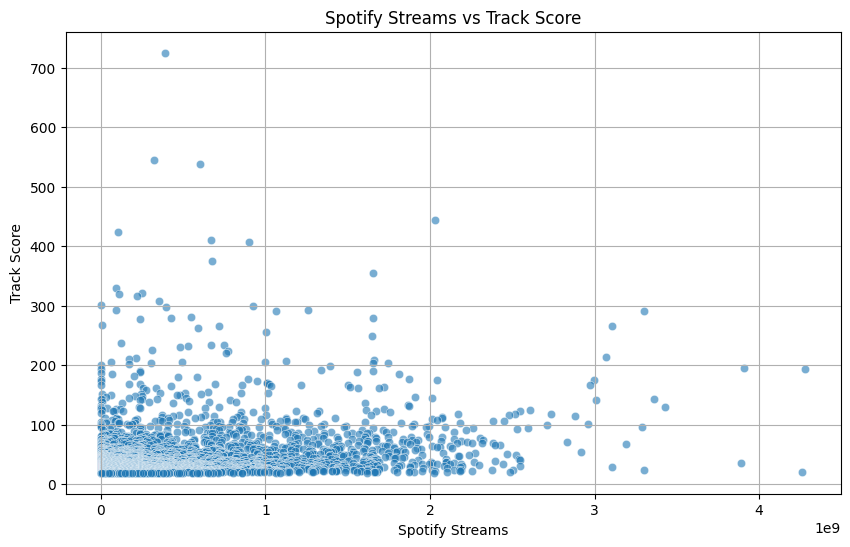

In [78]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='spotify_streams', y='track_score', data=df, alpha=0.6)
plt.title("Spotify Streams vs Track Score")
plt.xlabel("Spotify Streams")
plt.ylabel("Track Score")
plt.grid(True)
plt.show()

**Answers:** Here are the 3 key bullet points:

• **Extreme outliers exist**: One track has a ~720 Track Score with low streams, while several tracks have 4+ billion streams, far beyond the dense cluster of data concentrated at 0-1 billion streams and 0-200 Track Score.

• **These outliers will hurt model accuracy**: They can skew regression coefficients, inflate error metrics, violate statistical assumptions, and reduce the model's ability to predict typical track performance.

• **Solutions needed**: Consider log transformation of streams to normalize the distribution.

**Question:** Do explicit tracks perform differently?

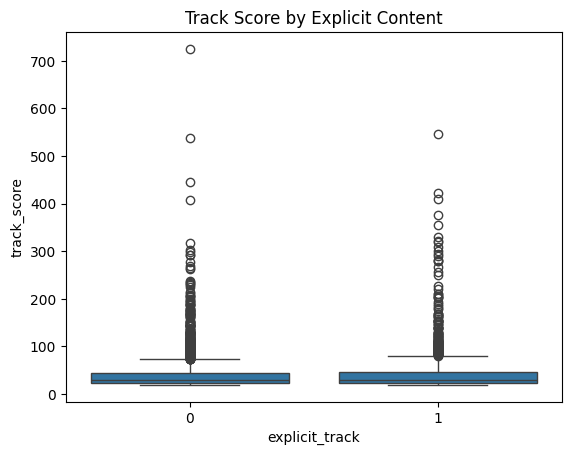

In [86]:
if "explicit_track" in df.columns:
    sns.boxplot(x="explicit_track", y="track_score", data=df)
    plt.title("Track Score by Explicit Content")
    plt.show()

**Answers:** No, explicit tracks (labeled "1") and non-explicit tracks (labeled "0") perform very similarly in terms of Track Score.

**What the graph shows:**
- Both groups have similar median scores (around 50-70, shown by the center line in the boxes)
- Both have similar ranges and distributions
- Both have outliers reaching up to ~700+ Track Score
- The box plots are nearly identical in shape and position

**Conclusion:** Whether a track has explicit content or not does NOT significantly affect its Track Score.

**Question:** Are recent songs more popular?

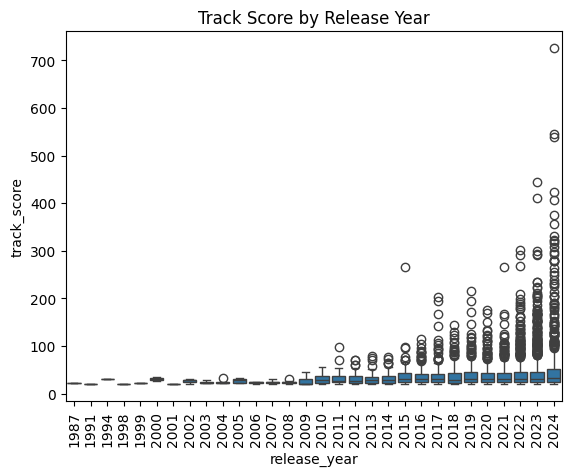

In [90]:
sns.boxplot(x="release_year", y="track_score", data=df)
plt.xticks(rotation=90)
plt.title("Track Score by Release Year")
plt.show()

**Answer:** Yes, recent songs appear to be more popular based on this graph.

**What the data shows:**
- Track Scores are clearly increasing over time from left (older years) to right (recent years)
- Songs from the 1980s-2000s have very low scores (mostly under 100)
- Songs from 2010 onwards show progressively higher scores
- The highest concentration of high-scoring tracks (200-700 range) appears in 2020-2024
- The median Track Score (shown by the blue boxes) steadily rises from near zero in the 1980s to around 50+ in recent years

**Conclusion:** Recent songs (especially from 2015-2024) are significantly more popular than older tracks based on Track Score.

**Question:** Do multiple platforms together affect popularity?

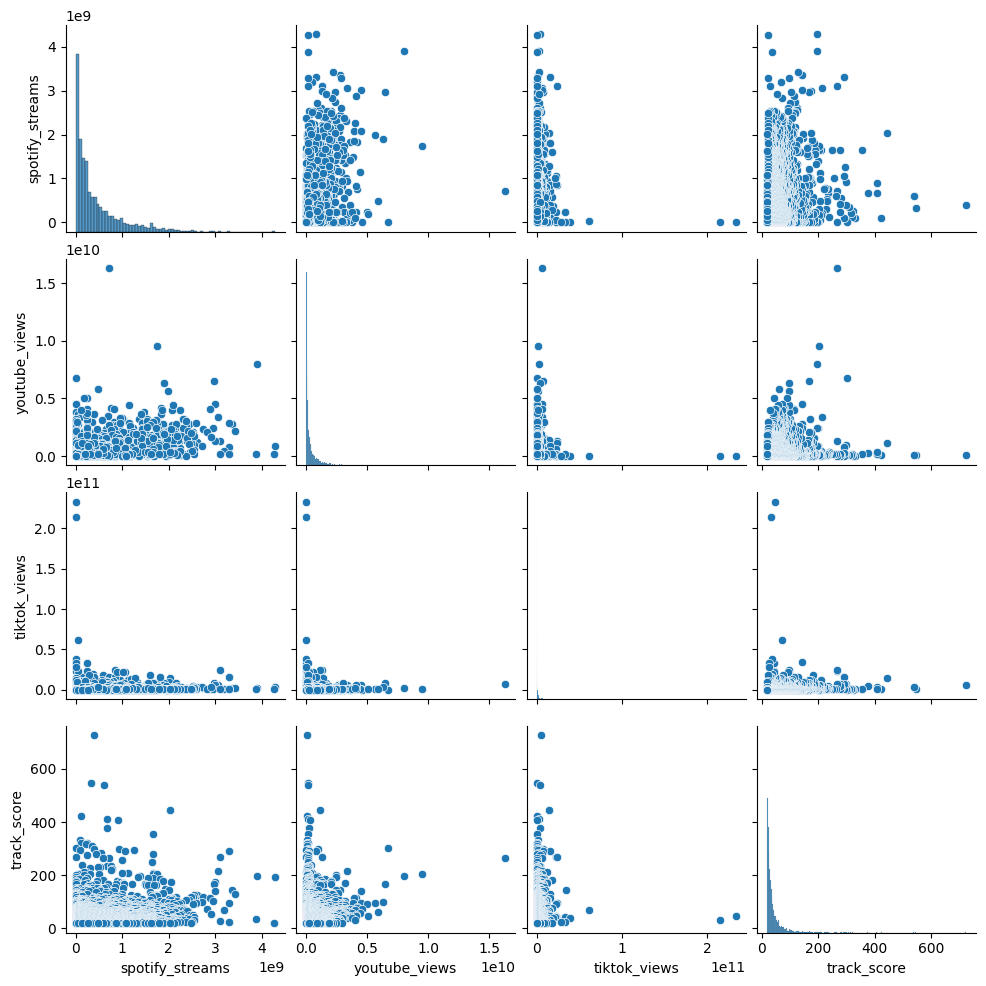

In [96]:
top_features = ['spotify_streams', 'youtube_views', 'tiktok_views', 'track_score']
sns.pairplot(df[top_features])
plt.show()

**Answer:** Yes, multiple platforms together strongly affect popularity. This scatter plot matrix shows clear positive relationships between platforms:

**Key observations:**

1. **Spotify Streams, YouTube Views, and TikTok Views all correlate positively with Track Score** - when any platform has high engagement, Track Score tends to be higher

2. **Cross-platform correlation** - the platforms correlate with each other (e.g., high Spotify Streams often means high YouTube Views), suggesting successful tracks perform well across multiple platforms simultaneously

3. **Cumulative effect** - tracks that achieve high engagement on multiple platforms (shown by the clustering patterns in the upper regions) tend to have the highest Track Scores

4. **The strongest pattern** appears in the bottom row (Track Score comparisons) - you can see positive linear relationships with all three platforms, but the concentration of high-scoring tracks appears where multiple platforms show strong performance

**Conclusion:** Popularity is driven by combined multi-platform engagement rather than success on just one platform - the more platforms a track performs well on, the higher its overall Track Score tends to be.

**Wrapping up EDA:**

We explored the dataset in detail through various visualizations and analysis. From the EDA, we were able to understand how different platform metrics like Spotify Streams, YouTube Views, and playlist counts strongly correlate with Track Score, while factors like explicit content show minimal impact. We also identified that recent songs (2015-2024) perform significantly bettes, and the data contains extreme outliers and right-skewed distributions that will require careful handling.

Based on these insights, we now have enough clarity to move to the next ep — building a predictive model for Track Score. The goal now is to use what we've understood from the data, apply appropriate transformations to handle skewed distributions and outliues, and train a model that can make accurate predictions about track popularity and guide strategic decision-making for music releases and marketing.

**Train - Test Split**

Before building our model, we need to split the data into training and testing sets. The model will learn patterns from the training set, and we’ll use the testing set to check how well it performs on unseen data.
. Let’s go with 80% training and 20% testire.

In [102]:
#Drop All Time Rank because it leaks information about popularity.
X = model_train_df.drop(columns=["track_score", "all_time_rank"], axis=1)
y = model_train_df["track_score"]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Model Selection – What a Data Scientist Should Think Before Choosing a Model**
We should never run models blindly. First, we ask key questions to guide our approach:

**1)What are we trying to do?**
We want to predict the popularity of a song by its Track Score using platform-related metrics like Spotify Streams, Spotify Playlist Count, YouTube Views, TikTok Likes, Apple Music Playlist Count, and Shazam Counts, along with release date features (Release_Year, Release_Month, Release_Day) and encoded artist information. This is a regression problem because the target, Track Score, is a continuous number.

**2) What do we know about the data?**
- The dataset has around 4,600 rows a medium-sized dataset.
- All numeric features are cleaned, missing values handled, and categorical features (Artist) encoded.
- The relationships between features and popularity may be linear or more complex we do not know yet.

**3) What do we want from the model?**
- Interpretability: to understand which factors influence song popularity.
- Performance: to predict Track Score as accurately as possible.

**4)Our plan for modeling:**
- Linear Regression: A simple baseline that is interpretable and helps us understand feature impact.
- Random Forest: Captures non-linear patterns and provides feature importance.
- XGBoost: High-performance model for maximizing prediction accuracy.

In [107]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"R²  : {r2:.2f}")
    print("-" * 30)

    return {
        "model": model.__class__.__name__,
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "model_object": model,
        "predictions": predictions
    }

In [109]:
models_before_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42)
]

results = []

for model in models_before_transform:
    result = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results.append(result)

Model: LinearRegression
MAE : 13.65
MSE : 625.01
R²  : 0.56
------------------------------
Model: RandomForestRegressor
MAE : 10.39
MSE : 493.82
R²  : 0.65
------------------------------


In [110]:
def evaluate_model_cv(model, X, y, cv=5):
    scores = cross_validate(model, X, y, cv=cv,
                            scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'),
                            return_train_score=False)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean R² : {scores['test_r2'].mean():.2f}")
    print(f"Mean MAE: {-scores['test_neg_mean_absolute_error'].mean():.2f}")
    print(f"Mean MSE: {-scores['test_neg_mean_squared_error'].mean():.2f}")
    print("-" * 30)

In [111]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)

evaluate_model_cv(lin_reg, X, y)
evaluate_model_cv(rf_reg, X, y)

Model: LinearRegression
Mean R² : -115.45
Mean MAE: 17.88
Mean MSE: 1273.75
------------------------------
Model: RandomForestRegressor
Mean R² : -61.39
Mean MAE: 17.66
Mean MSE: 1470.87
------------------------------


In [112]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [113]:
xgb_results = train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test)

Model: XGBRegressor
MAE : 8.18
MSE : 265.49
R²  : 0.81
------------------------------


In [114]:
evaluate_model_cv(xgb_model, X_train, y_train)

Model: XGBRegressor
Mean R² : 0.72
Mean MAE: 8.95
Mean MSE: 415.05
------------------------------


In [115]:
#log transformation
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

y_train_log.head()

2793    3.317816
3606    3.165475
643     4.109233
1270    3.763523
2155    3.465736
Name: track_score, dtype: float64

In [116]:
models_after_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42, verbosity=0)
]

log_model_results = []
for model in models_after_transform:
    result = train_and_evaluate(model, X_train, y_train_log, X_test, y_test_log)
    log_model_results.append(result)

Model: LinearRegression
MAE : 0.24
MSE : 0.11
R²  : 0.60
------------------------------
Model: RandomForestRegressor
MAE : 0.20
MSE : 0.07
R²  : 0.76
------------------------------
Model: XGBRegressor
MAE : 0.16
MSE : 0.05
R²  : 0.84
------------------------------


In [117]:
for model in models_after_transform:
    evaluate_model_cv(model, X_train, y_train_log)

Model: LinearRegression
Mean R² : 0.57
Mean MAE: 0.24
Mean MSE: 0.11
------------------------------
Model: RandomForestRegressor
Mean R² : 0.69
Mean MAE: 0.21
Mean MSE: 0.08
------------------------------
Model: XGBRegressor
Mean R² : 0.79
Mean MAE: 0.17
Mean MSE: 0.05
------------------------------


After testing different models, we found that log-transforming the target improved performance for all models by handling the skew in song popularity. Linear Regression performed reasonably well with an R² of 0.60, giving us interpretability and a baseline. Random Forest did better with an R² of 0.76, capturing non-linear patterns in the features. XGBoost achieved the best results with an R² of 0.84, showing it can model complex relationships and provide the most accurate predictions for song popularity. Overall, the log-transform helped reduce large errors, and XGBoost is our strongest model for this task.

**Feature Importance Analysis**

Now that we have trained and evaluated our models, it’s important to understand:
- Which platform-related features (like Spotify, YouTube, TikTok metrics) are influencing the predictions the most?
- What can we tell the Marketing and A&R teams about what drives a song’s popularity?
This helps turn a “black-box” model into something interpretable and actionable.

**What we are tackling:**
- Identify the top features using RandomForestRegressor and XGBRegressor.
- Visualize the feature importances with bar plots.
- Interpret the results in simple terms to explain which metrics matter most.
- Suggest practical applications, like playlist selection, targeted promotion, or predicting which songs are likely to go viral.

In [136]:
def plot_feature_importance(model, X, top_n=10):
    # Get feature importances from the model
    importances = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame and sort by importance
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
    plt.title(f"Top {top_n} Feature Importances - {model.__class__.__name__}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18068\182566893.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


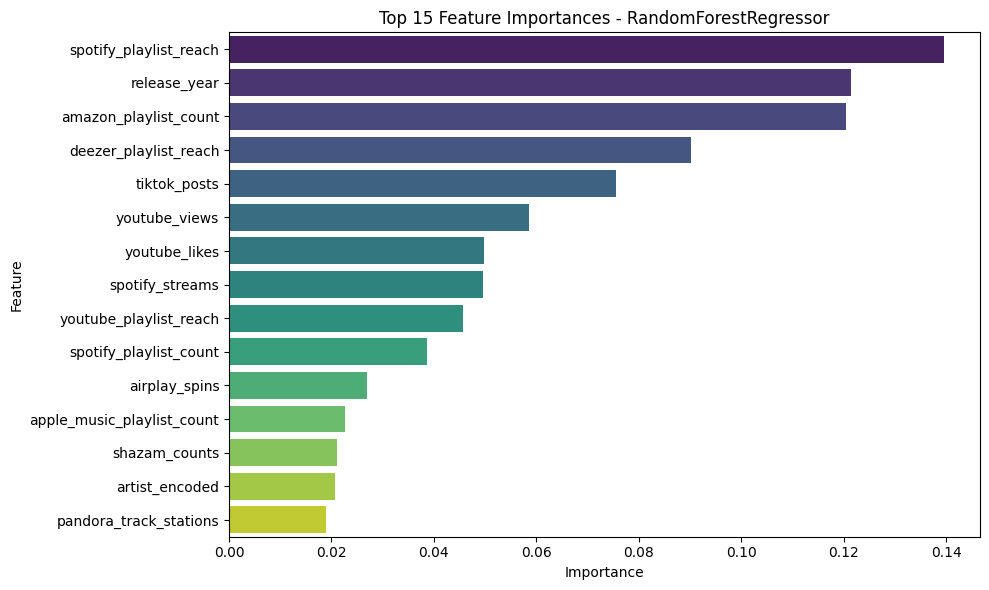

In [138]:
# Example usage for Random Forest
plot_feature_importance(models_after_transform[1], X_train, top_n=15)

In our graph the most influential feature is:

- Spotify Playlist Reach → The wider a song is featured on Spotify playlists, the more likely it is to gain streams.
- Release Year → Newer or trending releases tend to perform better.
- Amazon Playlist Count → Songs added to Amazon playlists are also likely to get more streams.
- Deezer Playlist Reach, TikTok Posts, YouTube Views → These platform metrics also have notable influence, showing that exposure across multiple platforms drives popularity.
- Spotify Streams, YouTube Playlist Reach, Spotify Playlist Count → Even the raw platform engagement metrics play a key role.

**Takeaway:** Platform reach and exposure matter the most, while release timing also plays an important role. Marketing and A&R teams can use this to focus promotion on high-reach playlists and cross-platform campaigns.

C:\Users\hp\AppData\Local\Temp\ipykernel_18068\182566893.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


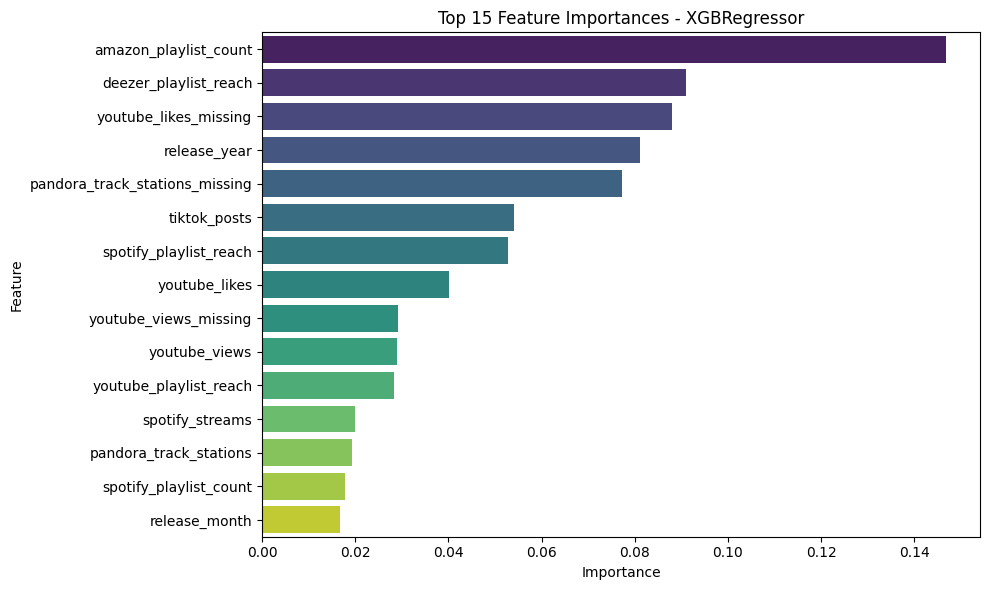

In [141]:
# Example usage for XGBoost
plot_feature_importance(models_after_transform[2], X_train, top_n=15)

Understanding our graph
- Playlist Placement & Reach: Amazon Playlist Count and Deezer Playlist Reach are the strongest predictors, showing that wider playlist exposure drives streams.
- Platform Engagement & Missing Data: YouTube Likes Missing and Pandora Track Missing indicate that even missing engagement data carries useful information for predicting popularity.
- Release Timing & Multi-Platform Promotion: Release Year, TikTok Posts, and Spotify Playlist Reach highlight the importance of recency and cross-platform promotion in boosting song popularity.

**Takeaway:** playlist placements (Amazon, Deezer), platform engagement metrics, and release timing are key predictors. The model also learns from missing data patterns, showing that absence of engagement on certain platforms can itself be informative. Marketing and A&R teams can prioritize playlist strategy and cross-platform exposure to maximize song streams.

**FINALLY**

We have successfully cleaned our dataset, performed exploratory data analysis, and built multiple models to predict song popularity based on platform metrics and release features.
The next step is to refactor our code into a modular structure, just like a data scientist or ML engineer would do in real-world projects. This means:
- Separating training, evaluation, and utility functions into clean, reusable files.
- Making the code more readable, reusable, and easier to debug or upgrade.
- Ensuring that the project can be collaborated on by multiple team members without breaking functionality.


Finally, we’ll **deploy our best model using Streamlit**, creating a user-friendly interface where users can input song features and see predicted streams. We’ll also display key insights from our EDA and model training to help teams like Marketing and A&R make data-driven decisions.
This step is about turning our notebook into a real, usable product not just a static analysis.

In [150]:
import os
import joblib

# Create a models folder inside the current project folder
os.makedirs("models", exist_ok=True)

# Save the model here
joblib.dump(models_after_transform[2], "models/xgboost_log_model.pkl")

['models/xgboost_log_model.pkl']